In [9]:
pip install jieba

  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314476 sha256=00267f5ceaa82f84d81b521daa0692f27cf4631b9632addc9c60f3afee253efd
  Stored in directory: c:\users\wang\appdata\local\pip\cache\wheels\7d\74\cf\08c94db4b784e2c1ef675a600b7b5b281fd25240dcb954ee7e
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import jieba
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType

In [12]:
study = pd.read_csv('C:/Users/wang/Desktop/NewFolder/study_information.csv', encoding='gbk')
user = pd.read_csv('C:/Users/wang/Desktop/NewFolder/users.csv', encoding='gbk')
login = pd.read_csv('C:/Users/wang/Desktop/NewFolder/login.csv', encoding='gbk')

In [13]:
#重复缺失值的处理
user = user.drop_duplicates()
study = study.dropna(subset=["price"])
user['school'] = user['school'].fillna('unknown')
dif = user['recently_logged'] == '--'
user.loc[dif,'recently_logged'] = user.loc[dif,'register_time']

login_count = login['login_place'].value_counts()
place = login_count.keys()
count = login_count.values

In [14]:
l = len(place)

words = ['广西南宁',
 '云南昆明','中国台湾','山西太原',
 '吉林长春',
 '福建厦门',
 '湖南永州',
 '山西大同',
 '辽宁沈阳',
 '广西北海',
 '甘肃兰州',
 '山西晋',
 '辽宁大连',
 '新疆伊犁哈萨克自治州',
 '辽宁抚顺',
 '新疆阿勒泰地区',
 '新疆巴音郭楞蒙古自治州','蒙古']

for i in words:
     jieba.del_word(i)
jieba.add_word('内蒙古')
jieba.add_word('山西')
jieba.add_word('湖南')

province_name = ['北京', '天津', '河北', '山西','内蒙古','辽宁', '吉林', '黑龙江','上海', '江苏', '浙江', '安徽', '福建', '江西','山东', '河南', '湖北', '湖南', '广东', '广西', '海南', '重庆', '四川', '贵州', '云南', '西藏','陕西', '甘肃','青海', '宁夏', '新疆','台湾']
province = dict()
for i in province_name:
    province[i] = 0

city = dict()

for i in range(0, l):
    place_name = jieba.lcut(place[i])
    if len(place_name) > 1:
        if place_name[1] in province:
            province[place_name[1]] += count[i]
        
        if len(place_name) == 3:
            if place_name[2] in city:
                city[place_name[2]] += count[i]
            else:
                city[place_name[2]] = count[i]  

p = list(province.keys())
v = list(province.values())
dt = []
for i in range(0,len(p)):
    dt.append((p[i], v[i]/75))


ct = list(city.keys())
cv = list(city.values())
dt_c = []
for i in range(0,len(ct)):
    dt_c.append((ct[i], cv[i]/75))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\wang\AppData\Local\Temp\jieba.cache
Loading model cost 0.585 seconds.
Prefix dict has been built successfully.


In [15]:
#省份热力图
c = (
    Geo()
    .add_schema(maptype="china")
    .add(
        "geo",
        dt,
        type_=ChartType.HEATMAP,
 
        
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(),
        title_opts=opts.TitleOpts(title="省份热力分布图"),
        
    ).render('province.html')
)
c
#城市热力图
c2 = (
    Geo( is_ignore_nonexistent_coord = True)
    .add_schema(maptype="china")
    .add(
        "geo",
        dt_c,
        type_=ChartType.HEATMAP,
 
        
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(),
        title_opts=opts.TitleOpts(title="城市热力分布图"),
        
    ).render('city.html')
)
c2

'c:\\Users\\wang\\Downloads\\city.html'

C:\Users\wang\AppData\Local\Temp/ipykernel_20648/3953561070.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  logintime['Time'] = pd.to_datetime(logintime['Time'])
c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0, flags=flags)


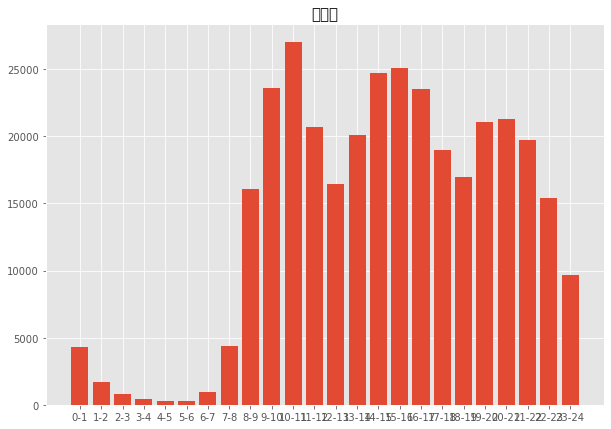

c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20241 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24687 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20241 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24687 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\wang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26085 missing from current fon

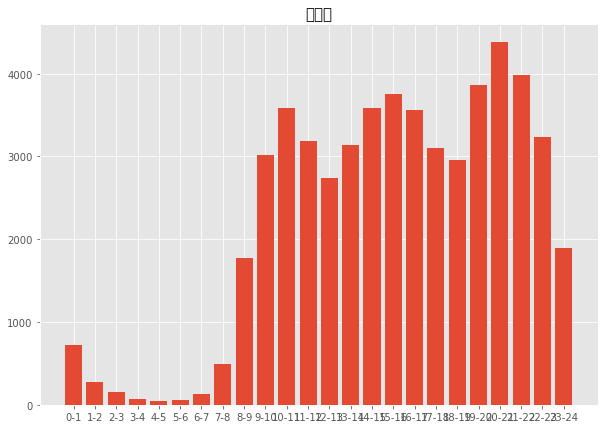

In [27]:
#把登陆时间转化为星期形式
logintime = pd.read_csv('C:/Users/wang/Desktop/NewFolder/login.csv',encoding = "gbk")
logintime['login_time'] = pd.to_datetime(logintime['login_time'])
logintime['week'] = logintime['login_time'].apply(lambda x:x.weekday())
logintime['work'] = logintime['week'].apply(lambda x:True if x<=5 else False)
logintime['Time'] = logintime['login_time'].astype(str)
logintime['Time'] = logintime['Time'].apply(lambda x:x.split(' ')[1])
logintime['Time'] = pd.to_datetime(logintime['Time'])
logintime['Time'] = logintime['Time'].dt.strftime('%H,%M,%S') 
logintime['Time'] = logintime['Time'].apply(lambda x:x.split(',')[0])
logintime['Time'] = logintime['Time'].apply(lambda x:x + " - " + str(int(x) + 1) )


#区分工作日与休息日
login_work = logintime[logintime['work'] == True]
login_rest = logintime[logintime['work'] == False]

workday = login_work.groupby('Time')['Time'].count()
restday = login_rest.groupby('Time')['Time'].count()

x_list = []
for x in range(0,24):
    st = "{0}-{1}".format(str(x),str(x+1))
    x_list.append(st)

# 柱状图
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x = x_list, height = workday)
ax.set_title("工作日", fontsize=15)
plt.show()

plt.style.use("ggplot")
fig2, ax2 = plt.subplots(figsize=(10, 7))
ax2.bar(x = x_list, height = restday)
ax2.set_title("休息日", fontsize=15)
plt.show()